In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
hits = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']

In [7]:

def draw_edgelists(network, 
                  highlight = [], 
                  add_process = False, 
                  add_mtb = False,
                  node_colour = 'blue',
                  process_colour = 'lightgreen', 
                  mtb_colour = 'red', 
                  highlight_colour='lightblue'):

    # create edgelist

    edges = []
    nodes = {}

    lines = open(network).readlines()[1:] # remove headers
    for line in lines:
        line = line.split(',')

        node1=line[0].strip()
        node2=line[1].strip()
        if node1 not in nodes: nodes[node1] = node_colour
        if node2 not in nodes: nodes[node2] = node_colour

        edge = line[0].strip()+' '+line[1].strip()
        edges.append(edge)

    add_nodes={}
    process = open(add_process).readlines()[1:] if add_process else []
    mtb =  open(add_mtb).readlines()[1:] if add_mtb else []
    for lines, colour in zip([process, mtb], [process_colour, mtb_colour]): # keep ordered
        for node in nodes:
            for line in lines:
                if node in line:
                    line = line.split(',')

                    node1=line[0].strip()
                    node=line[1].strip()
                    if node1 not in nodes: add_nodes[node1] = colour
                    if node2 not in nodes: add_nodes[node2] = colour

                    edge = line[0].strip()+' '+line[1].strip()
                    edges.append(edge)
    
    nodes.update(add_nodes)
    
    
    for node in nodes:     # color highlight nodes
        if node in highlight: nodes[node]=highlight_colour

    nodelist = nodes.keys()
    colorlist = nodes.values()
    
    # write/read edgelist
    
    open("edgelist.nx", 'w+').write('\n'.join(edges))
    G=nx.read_edgelist('edgelist.nx')

    # plot
    
    nx.draw(G, with_labels=True, node_size=100, font_color='white', font_size=16, nodelist=nodelist, node_color=colorlist)
    plt.gcf().set_size_inches(20, 20)
    plt.gcf().set_facecolor('grey')



In [8]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']

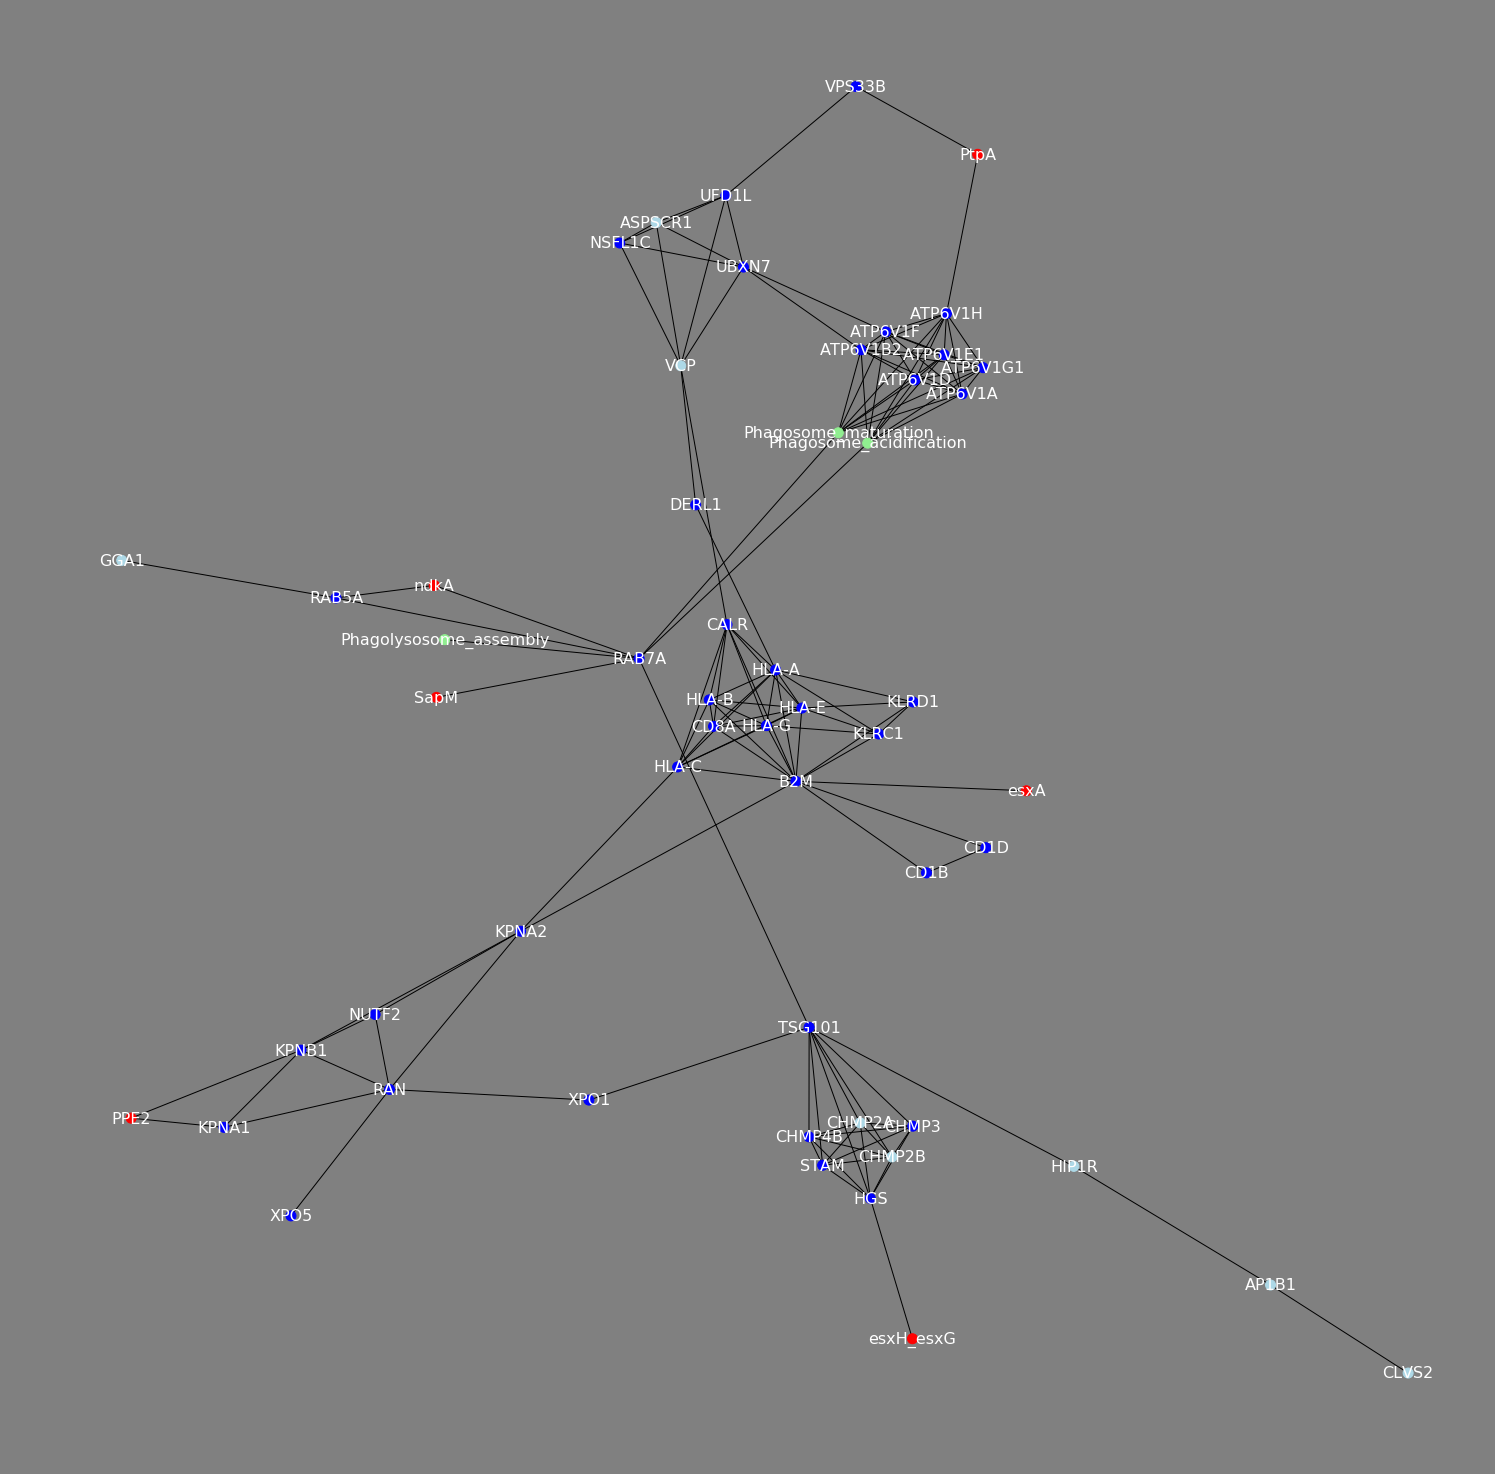

In [9]:
draw_edgelists('string-network-1.csv', add_mtb='mtb-edgelist.csv', add_process='string-1-process-edgelist.csv', highlight=hit)

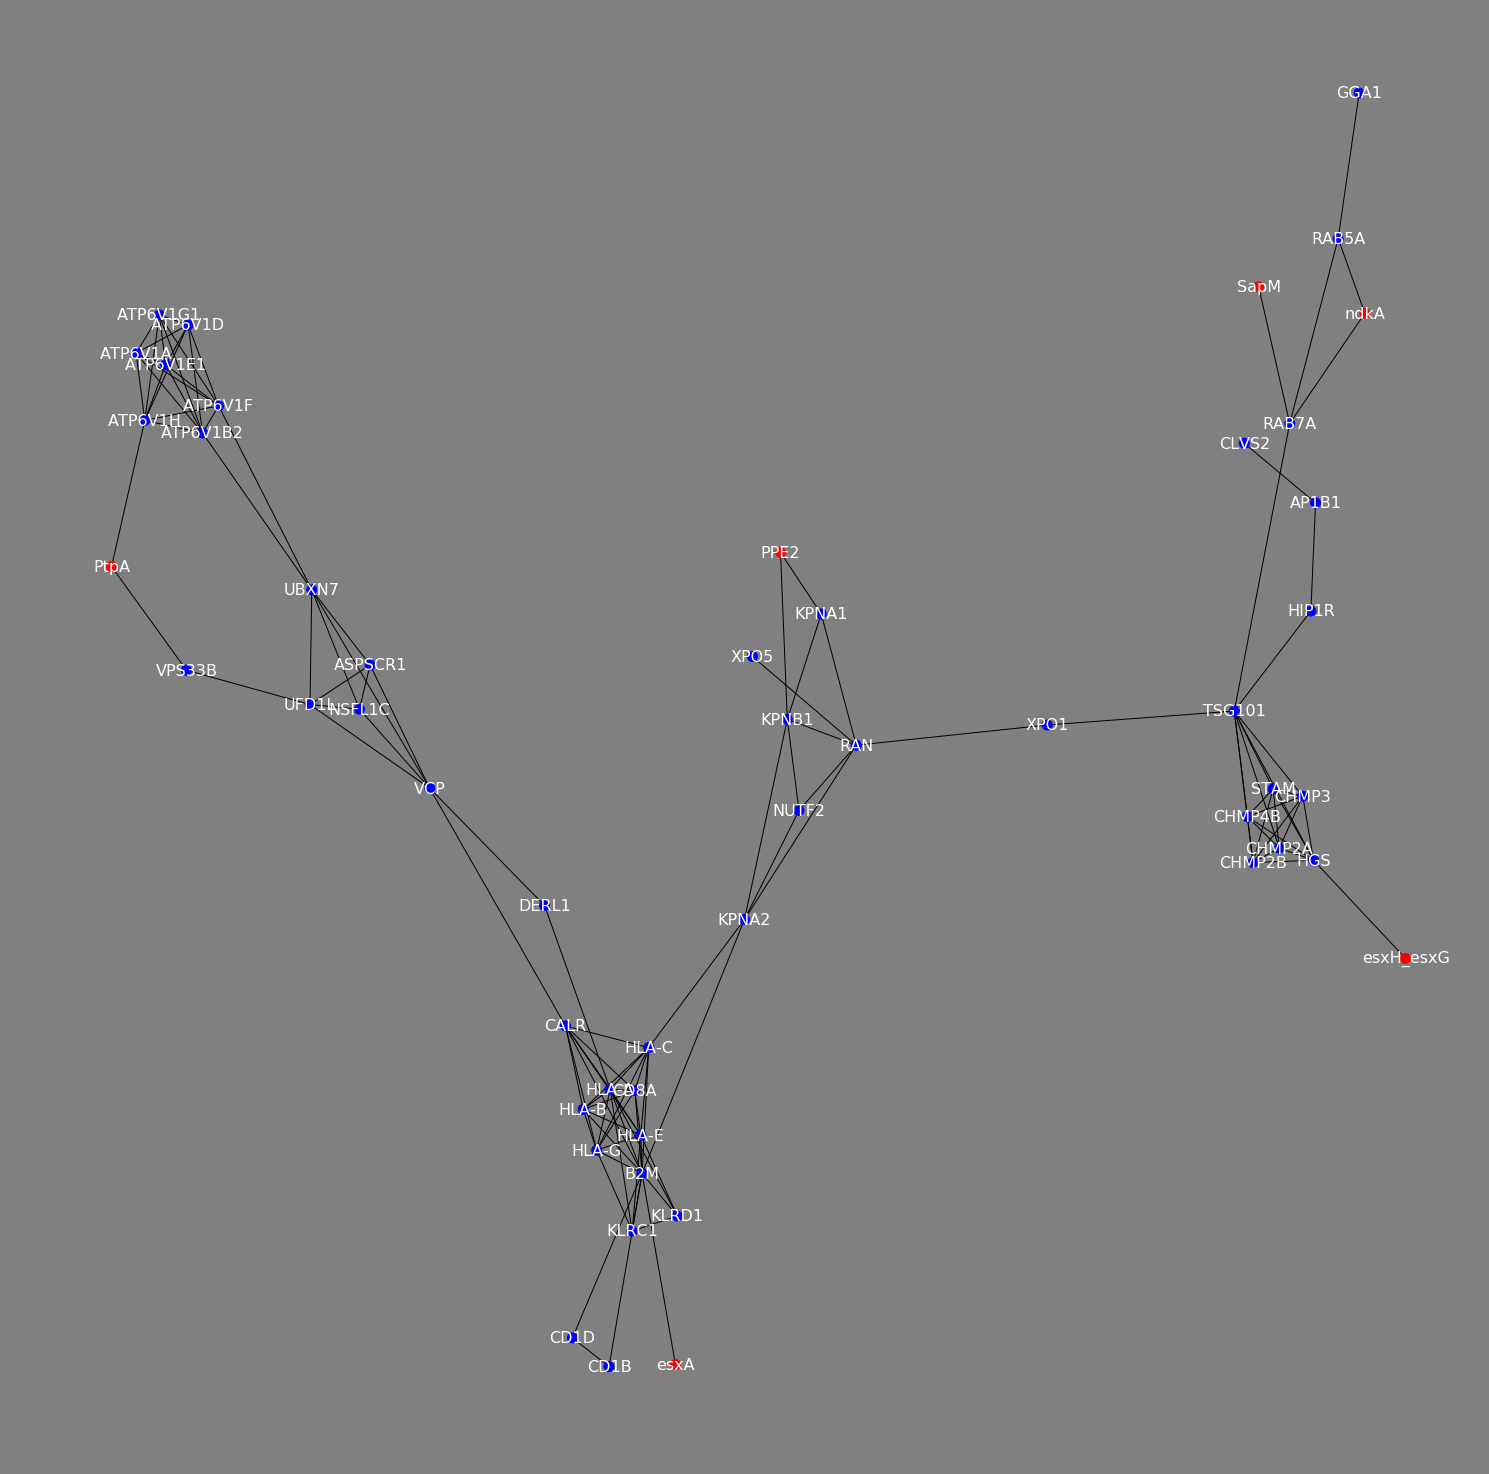

In [11]:
draw_edgelists('string-network-1.csv', add_mtb='mtb-edgelist.csv')